In [117]:
# importing all important libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud

In [136]:
df = pd.read_csv(r"/content/Resume_Data.csv", encoding = 'latin1') #using different encoding function as utf-8 encoder faced difficulties to encode the file.
df['Cleaned_Resume']= ''
df.head()

,Category,Resume,Cleaned_Resume
0,NaN,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [137]:
# lets check the categories of resume
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
Data Science                 39
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

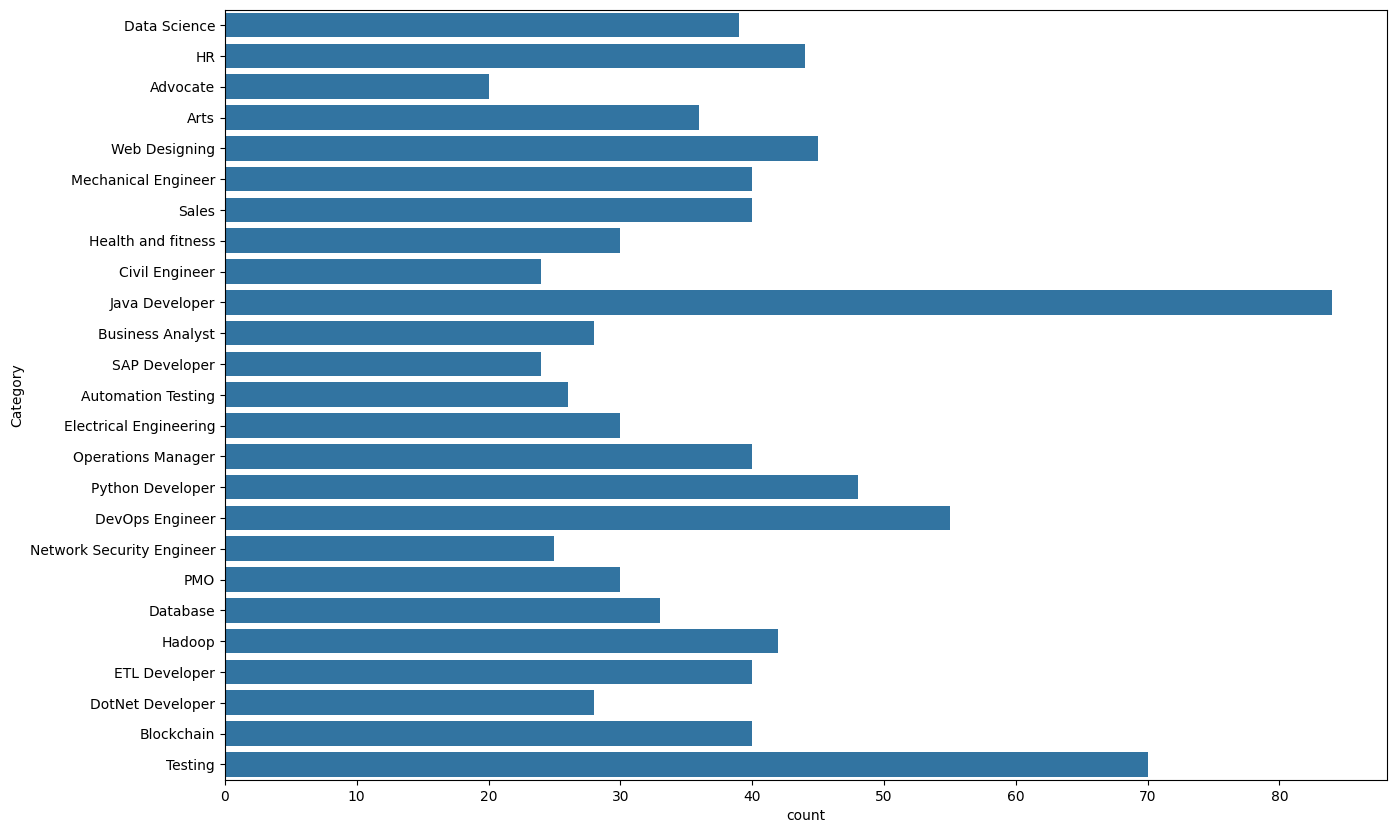

In [138]:
# lets plot the categories of resume
plt.figure(figsize=(15,10))
sns.countplot(df['Category'])
plt.show()

We have received the highest number of resume's for  "java developer" and "testing" roles respeetively.


#Cleaning the resume texts

In [139]:
# lets have a first glimpse of the data
df['Resume'][34]

'Education Details \n MCA   YMCAUST,  Faridabad,  Haryana\nData Science internship \n\n\nSkill Details \nData Structure- Exprience - Less than 1 year months\nC- Exprience - Less than 1 year months\nData Analysis- Exprience - Less than 1 year months\nPython- Exprience - Less than 1 year months\nCore Java- Exprience - Less than 1 year months\nDatabase Management- Exprience - Less than 1 year monthsCompany Details \ncompany - Itechpower\ndescription - '

In [140]:
df['Resume'][2]


'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\nJanuary 2015    DEEKSHA CENTER\nJanuary 2013    Little Flower Public School\nAugust 2000    Manipal Academy of Higher\nDATA SCIENCE \n\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\nSkill Details \nData Analysis- Exprience - Less 

So, as we can see there are lot's of special characters that are needed to be cleaned for better analysis.

In [141]:
import re

def clean_resume(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text) # removing the hyperlinks
    resume_text = re.sub('RT|cc', ' ', resume_text) # removing RT and CC
    resume_text = re.sub('#\S+', ' ', resume_text) # removing hashtags
    resume_text = re.sub('@\S+', ' ', resume_text) # removing mentions and @
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text) # removing punctuations
    resume_text = re.sub(r'[^\x00-\xFF]', r' ', resume_text) # removing non-ISO-8859-15 characters
    resume_text = re.sub('\s+', ' ', resume_text) # removing extra spaces
    resume_text = re.sub('â\s*¢', ' ', resume_text) # removing (â ¢)
    resume_text = re.sub('â\s*€', ' ', resume_text) # removing (â €)
    resume_text = re.sub('â\s*£', ' ', resume_text) # removing (â !)
    resume_text = re.sub('â\s*¥', ' ', resume_text) # removing (â !)
    resume_text = re.sub('â\s*¤', ' ', resume_text) # removing (â !)
    resume_text = re.sub('â\s*ª', ' ', resume_text) # removing (â !)
    resume_text = re.sub('â\s*º', ' ', resume_text) # removing (â !)
    resume_text = re.sub('Ă\s*ª', ' ', resume_text) # removing (â !)

    return resume_text

# Assuming df is already defined and contains a column 'Resume'

# Apply the cleaning function to the 'Resume' column
df['Cleaned_Resume'] = df.Resume.apply(lambda x: clean_resume(x))

# Print the cleaned resumes
print(df['Cleaned_Resume'])


0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills   R   Python   SAP HANA   Tableau   SAP...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills   Proficient in MS office Word...
958    â Willingness to a ept the challenges â Posi...
959    PERSONAL SKILLS   Quick learner   Eagerness to...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Cleaned_Resume, Length: 962, dtype: object


In [142]:
df.head()

,Category,Resume,Cleaned_Resume
0,NaN,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,Skills R Python SAP HANA Tableau SAP...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [143]:
len(df)

962

In [144]:
corpus = " "

for  i in range(0,962):
  corpus = corpus + df['Cleaned_Resume'][i]

In [145]:
corpus[1000:2500]

' review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity NaÃ¯ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND AN

In [151]:
# creating tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# tokeinizing the text
tokens = tokenizer.tokenize(corpus)

len(tokens)

415666

In [152]:
# making all the words into lowercase for uniformity

words = []

for word in tokens:
  words.append(word.lower())

In [153]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:
# searching all the stopwords

stopwords = nltk.corpus.stopwords.words('english')

words_new = []
# removing all the stop words
for word in words:
  if word not in stopwords:
    words_new.append(word)

In [155]:
len(words_new)

322063

#Lemmatization

In [156]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
word_net = WordNetLemmatizer()

lematize_words = []
for word in words_new:
  lematize_words.append(word_net.lemmatize(word))

In [158]:
len(lematize_words)

322063

In [159]:
same = 0
different = 0
for i in range(0, 1832):
  if(lematize_words[i]==words_new[i]):
    same = same + 1
  else:
    different = different + 1
print('Number of words Lemmatized=', different)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


#Frequency Distribution

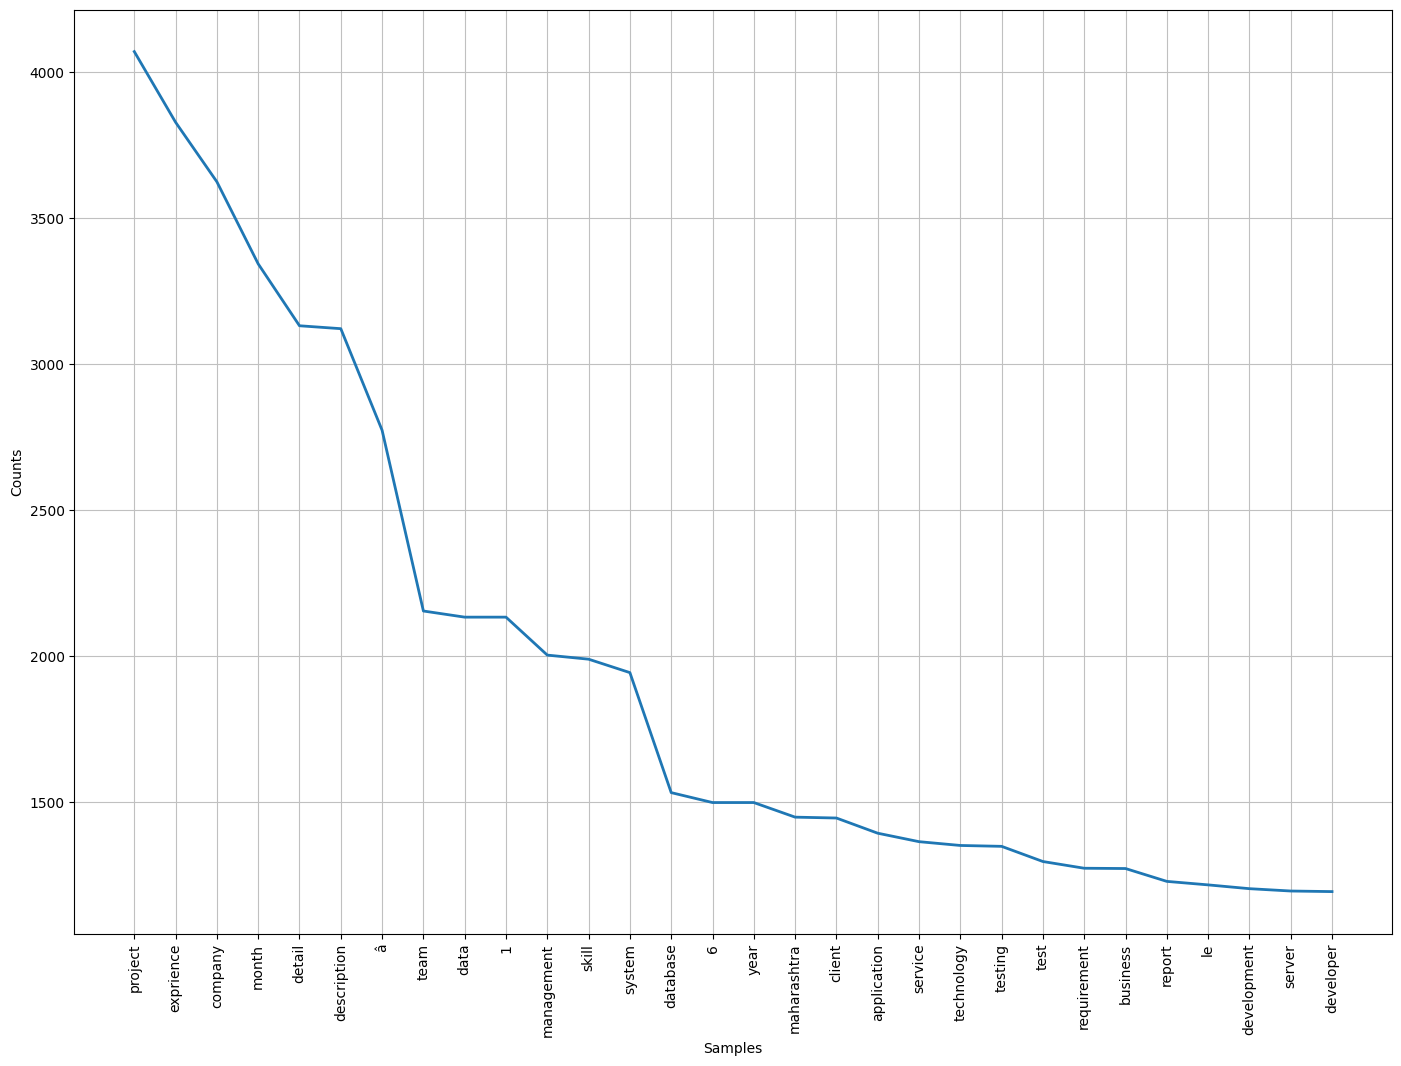

<Axes: xlabel='Samples', ylabel='Counts'>

In [160]:
frequency = nltk.FreqDist(lematize_words)

plt.subplots(figsize=(17,12))
frequency.plot(30)

In [161]:
len(frequency)

6803

In [162]:
most_common = frequency.most_common(50)
most_common

[('project', 4071),
 ('exprience', 3829),
 ('company', 3625),
 ('month', 3344),
 ('detail', 3132),
 ('description', 3122),
 ('â', 2774),
 ('team', 2155),
 ('data', 2134),
 ('1', 2134),
 ('management', 2004),
 ('skill', 1990),
 ('system', 1944),
 ('database', 1533),
 ('6', 1499),
 ('year', 1499),
 ('maharashtra', 1449),
 ('client', 1446),
 ('application', 1394),
 ('service', 1365),
 ('technology', 1352),
 ('testing', 1349),
 ('test', 1297),
 ('requirement', 1274),
 ('business', 1273),
 ('report', 1229),
 ('le', 1217),
 ('development', 1204),
 ('server', 1196),
 ('developer', 1194),
 ('customer', 1178),
 ('ltd', 1177),
 ('process', 1163),
 ('responsibility', 1137),
 ('using', 1124),
 ('sql', 1120),
 ('january', 1090),
 ('java', 1076),
 ('engineering', 1055),
 ('work', 1038),
 ('pune', 1026),
 ('role', 969),
 ('c', 951),
 ('user', 905),
 ('operation', 895),
 ('software', 886),
 ('pvt', 879),
 ('sale', 845),
 ('activity', 832),
 ('environment', 797)]

#Word Cloud

In [163]:
# converting lematized words into string
res=' '.join([i for i in lematize_words if not i.isdigit()])

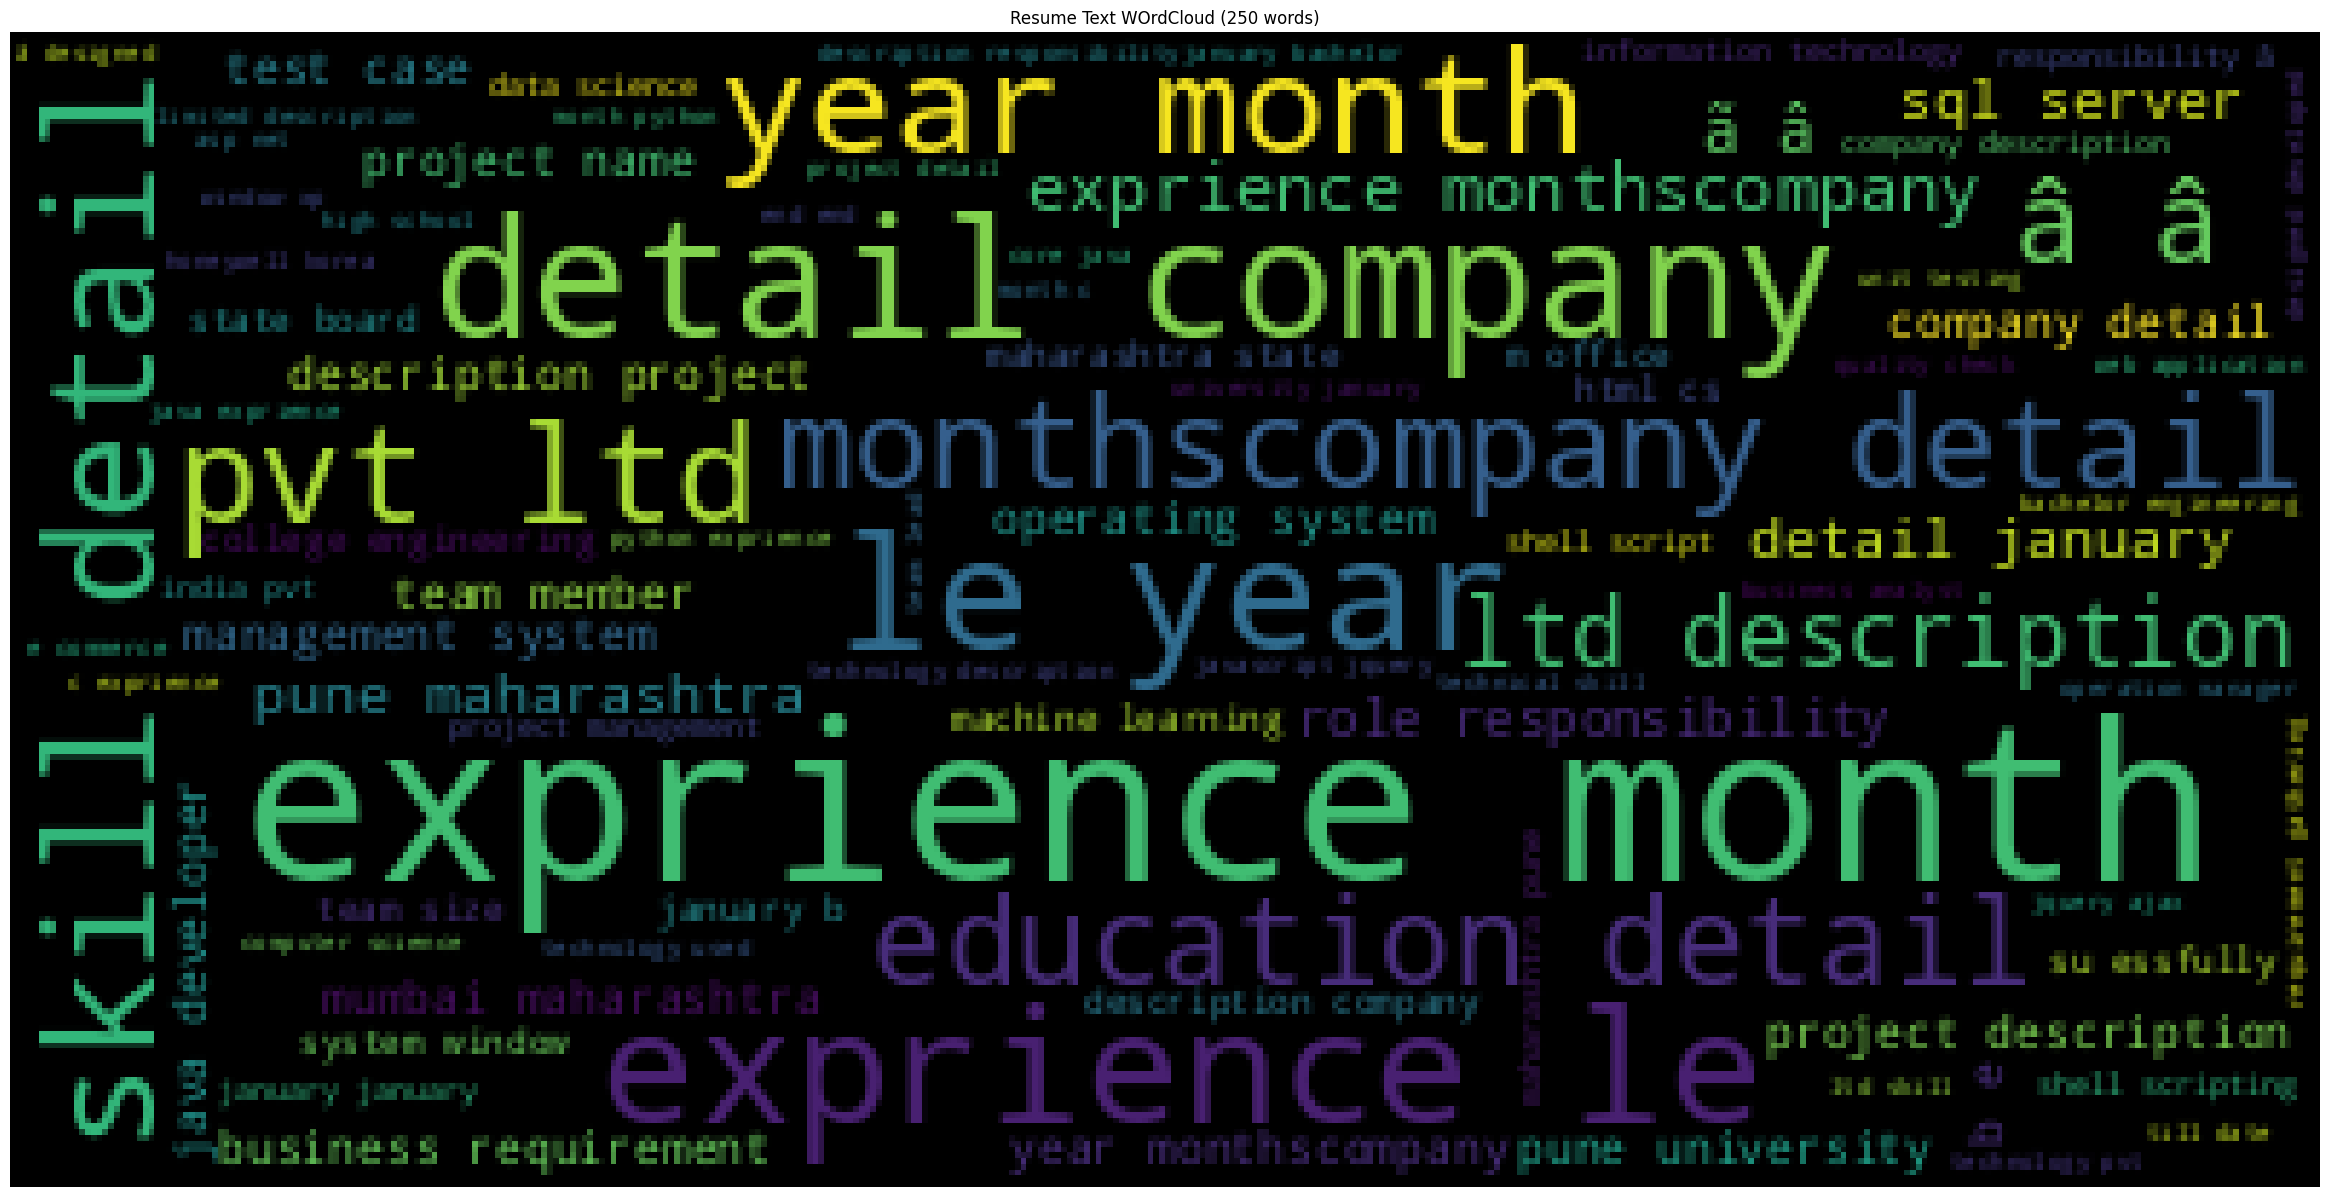

In [167]:
plt.subplots(figsize=(35,15))
wordcloud = WordCloud(background_color='black').generate(res)
plt.imshow(wordcloud)
plt.title("Resume Text WOrdCloud (250 words)")
plt.axis('off')
plt.show()

#Category Analysis

In [169]:
data_science = df[df['Category'] == 'Data Science']
data_science.head()

,Category,Resume,Cleaned_Resume
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,Skills R Python SAP HANA Tableau SAP...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...


In [170]:
len(data_science)

39

In [171]:
data_science['Cleaned_Resume']

1     Education Details May 2013 to May 2017 B E UIT...
2     Areas of Interest Deep Learning Control System...
3     Skills   R   Python   SAP HANA   Tableau   SAP...
4     Education Details MCA YMCAUST Faridabad Haryan...
5     SKILLS C Basics IOT Python MATLAB Data Science...
6     Skills   Python   Tableau   Data Visualization...
7     Education Details B Tech Rayat and Bahra Insti...
8     Personal Skills   Ability to quickly grasp tec...
9     Expertise â Data and Quantitative Analysis â D...
10    Skills Programming Languages Python pandas num...
11    Education Details May 2013 to May 2017 B E UIT...
12    Areas of Interest Deep Learning Control System...
13    Skills   R   Python   SAP HANA   Tableau   SAP...
14    Education Details MCA YMCAUST Faridabad Haryan...
15    SKILLS C Basics IOT Python MATLAB Data Science...
16    Skills   Python   Tableau   Data Visualization...
17    Education Details B Tech Rayat and Bahra Insti...
18    Personal Skills   Ability to quickly grasp

In [172]:
data_science_corpus = " "

for index , row in data_science.iterrows():
  data_science_corpus = data_science_corpus + row['Cleaned_Resume']

In [173]:
data_science_corpus

' Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github c

In [174]:
data_science_corpus=data_science_corpus.lower()

In [175]:
words_data_science=data_science_corpus.split()

In [176]:
print('Frequency of "python" is:', words_data_science.count('python'))

Frequency of "python" is: 170


In [177]:
print('Frequency of "sql" is:', words_data_science.count('sql'))

Frequency of "sql" is: 71


In [178]:
print('Frequency of "analysis" is:', words_data_science.count('analysis'))

Frequency of "analysis" is: 76


In [179]:
print('Frequency of "data" is:', words_data_science.count('data'))

Frequency of "data" is: 385


In [181]:
print('Frequency of "pandas" is:', words_data_science.count('pandas'))

Frequency of "pandas" is: 23


In [182]:
print('Frequency of "r" is:', words_data_science.count('r'))

Frequency of "r" is: 36
